# Data Collection and Cleaning for Market Risk Analysis

In this notebook, we will:
- Download historical market data using yfinance.
- Clean the data by handling missing values.
- Compute daily returns.
- Perform basic exploratory data analysis.

YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  1 of 1 completed

Initial data:
Price             Close         High          Low         Open      Volume
Ticker            ^GSPC        ^GSPC        ^GSPC        ^GSPC       ^GSPC
Date                                                                      
2015-01-02  2058.199951  2072.360107  2046.040039  2058.899902  2708700000
2015-01-05  2020.579956  2054.439941  2017.339966  2054.439941  3799120000
2015-01-06  2002.609985  2030.250000  1992.439941  2022.150024  4460110000
2015-01-07  2025.900024  2029.609985  2005.550049  2005.550049  3805480000
2015-01-08  2062.139893  2064.080078  2030.609985  2030.609985  3934010000

Missing values in each column:
Price   Ticker
Close   ^GSPC     0
High    ^GSPC     0
Low     ^GSPC     0
Open    ^GSPC     0
Volume  ^GSPC     0
dtype: int64

Type of sp500:
<class 'pandas.core.frame.DataFrame'>

Columns after forward-fill:
MultiIndex([( 'Close', '^GSPC'),
            (  'High', '^GSPC'),
            (   'Low', '^GSPC'),
            (  'Open', '^GSPC'),
           

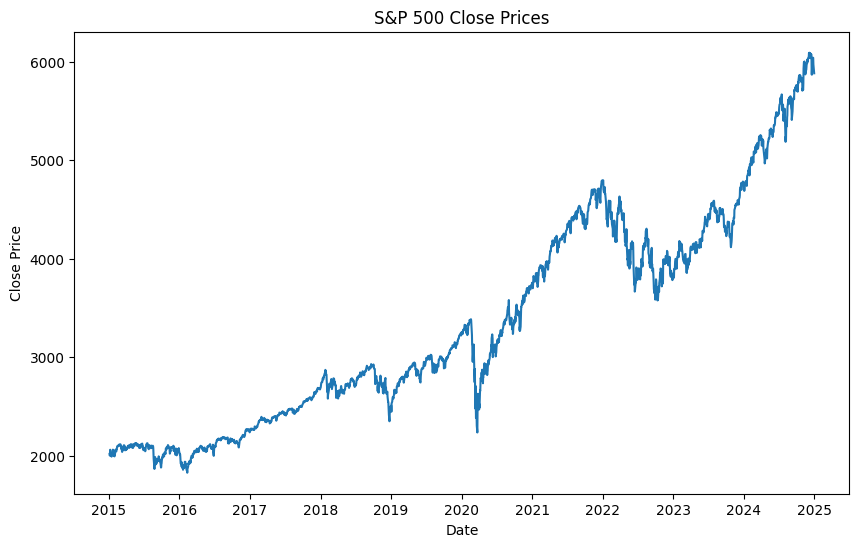

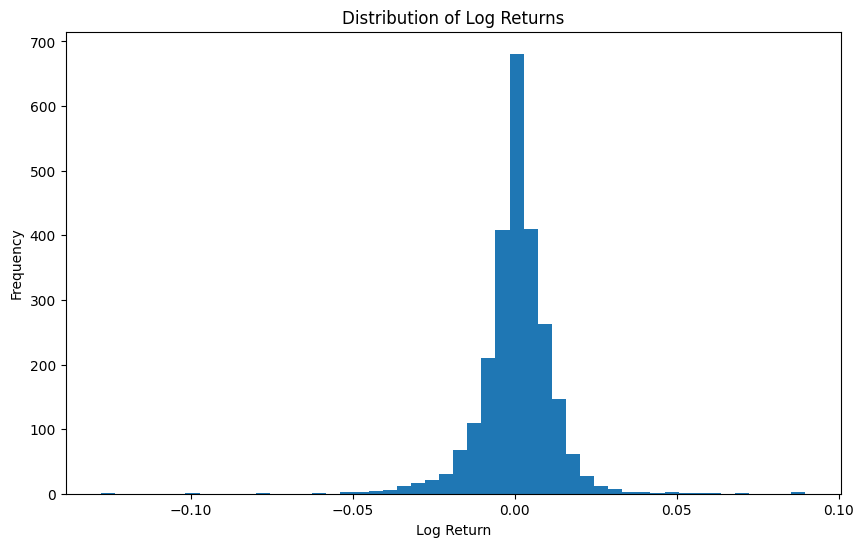

Cleaned data saved as sp500_data_cleaned.csv


In [1]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# parameters for data download
ticker = '^GSPC'
start_date = '2015-01-01'
end_date = '2025-01-01'

# S&P 500 data; columns are stored as a MultiIndex
sp500 = yf.download(ticker, start=start_date, end=end_date)

# printing the first few rows
print("Initial data:")
print(sp500.head())

# missing values
print("\nMissing values in each column:")
print(sp500.isnull().sum())

print("\nType of sp500:")
print(type(sp500))

# missing values fill using forward-fill
sp500 = sp500.ffill()

print("\nColumns after forward-fill:")
print(sp500.columns)

# log returns
sp500.loc[:, ('Log Returns', '^GSPC')] = np.log(
    sp500.loc[:, ('Close', '^GSPC')] / sp500.loc[:, ('Close', '^GSPC')].shift(1)
)

# dropping no return row
sp500 = sp500.dropna(subset=[('Log Returns', '^GSPC')])

# check print row
print("\nFirst five rows of Close and Log Returns:")
print(sp500[[('Close', '^GSPC'), ('Log Returns', '^GSPC')]].head())

# summary statistics for Log returns
print("\nSummary statistics for Log Returns:")
print(sp500[[('Log Returns', '^GSPC')]].describe())

# closing price over time
plt.figure(figsize=(10, 6))
plt.plot(sp500.index, sp500[('Close', '^GSPC')])
plt.title("S&P 500 Close Prices")
plt.xlabel("Date")
plt.ylabel("Close Price")
plt.show()

# returns histogram
plt.figure(figsize=(10, 6))
plt.hist(sp500[('Log Returns', '^GSPC')], bins=50)
plt.title("Distribution of Log Returns")
plt.xlabel("Log Return")
plt.ylabel("Frequency")
plt.show()

# CSV output
sp500.to_csv("sp500_data_cleaned.csv", index=True)
print("Cleaned data saved as sp500_data_cleaned.csv")


[*********************100%***********************]  1 of 1 completed

Initial data:
Price           Close       High        Low       Open     Volume
Ticker           AAPL       AAPL       AAPL       AAPL       AAPL
Date                                                             
2015-01-02  24.320435  24.789804  23.879983  24.778681  212818400
2015-01-05  23.635283  24.169162  23.448426  24.089080  257142000
2015-01-06  23.637510  23.897776  23.274916  23.699796  263188400
2015-01-07  23.968956  24.069058  23.735383  23.846608  160423600
2015-01-08  24.889900  24.947738  24.180285  24.298185  237458000

Missing values in each column:
Price   Ticker
Close   AAPL      0
High    AAPL      0
Low     AAPL      0
Open    AAPL      0
Volume  AAPL      0
dtype: int64

Type of apple:
<class 'pandas.core.frame.DataFrame'>

Columns after forward-fill:
MultiIndex([( 'Close', 'AAPL'),
            (  'High', 'AAPL'),
            (   'Low', 'AAPL'),
            (  'Open', 'AAPL'),
            ('Volume', 'AAPL')],
           names=['Price', 'Ticker'])

First five rows

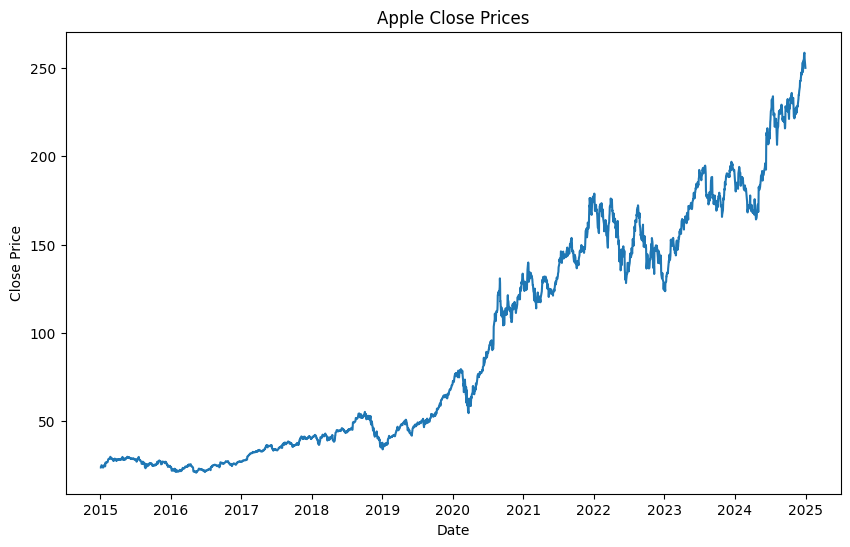

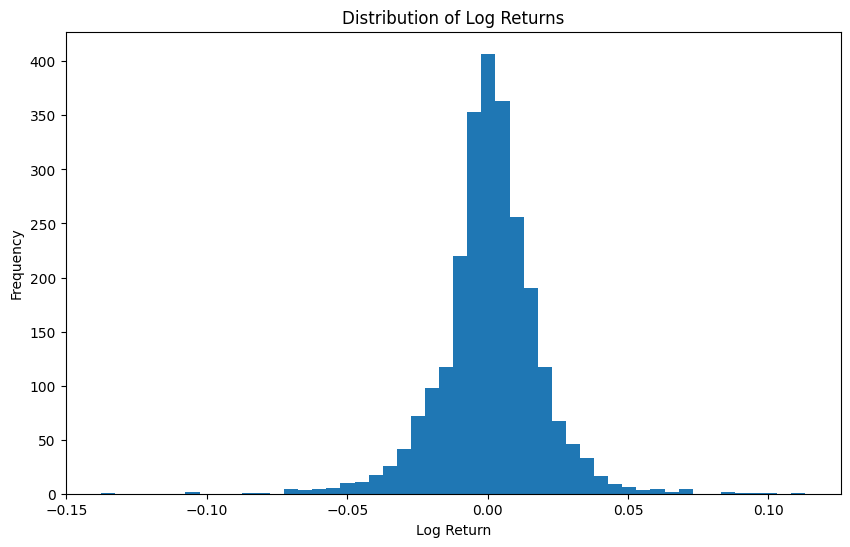

Cleaned data saved as apple_data_cleaned.csv


In [3]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# parameters for data download
ticker = 'AAPL'  # Corrected ticker symbol
start_date = '2015-01-01'
end_date = '2025-01-01'

# AAPL data; columns are stored as a MultiIndex
apple = yf.download(ticker, start=start_date, end=end_date)

# Check if the DataFrame is empty
if apple.empty:
    print("Error: AAPL data download failed. Check the ticker symbol, date range, and network connection.")
else:
    # printing the first few rows
    print("Initial data:")
    print(apple.head())

    # missing values
    print("\nMissing values in each column:")
    print(apple.isnull().sum())

    print("\nType of apple:")
    print(type(apple))

    # missing values fill using forward-fill
    apple = apple.ffill()

    print("\nColumns after forward-fill:")
    print(apple.columns)

    # log returns
    apple.loc[:, ('Log Returns', 'AAPL')] = np.log(
        apple.loc[:, ('Close', 'AAPL')] / apple.loc[:, ('Close', 'AAPL')].shift(1)
    )

    # dropping no return row
    apple = apple.dropna(subset=[('Log Returns', 'AAPL')])

    # check print row
    print("\nFirst five rows of Close and Log Returns:")
    print(apple[[('Close', 'AAPL'), ('Log Returns', 'AAPL')]].head())

    # summary statistics for Log returns
    print("\nSummary statistics for Log Returns:")
    print(apple[[('Log Returns', 'AAPL')]].describe())

    # closing price over time
    plt.figure(figsize=(10, 6))
    plt.plot(apple.index, apple[('Close', 'AAPL')])  # Corrected DataFrame name
    plt.title("Apple Close Prices")
    plt.xlabel("Date")
    plt.ylabel("Close Price")
    plt.show()

    # returns histogram
    plt.figure(figsize=(10, 6))
    plt.hist(apple[('Log Returns', 'AAPL')], bins=50)
    plt.title("Distribution of Log Returns")
    plt.xlabel("Log Return")
    plt.ylabel("Frequency")
    plt.show()

    # CSV output
    apple.to_csv("apple_data_cleaned.csv", index=True)
    print("Cleaned data saved as apple_data_cleaned.csv")

[*********************100%***********************]  1 of 1 completed

Initial data:
Price           Close       High        Low       Open    Volume
Ticker           MSFT       MSFT       MSFT       MSFT      MSFT
Date                                                            
2015-01-02  40.072128  40.637731  39.883596  39.986432  27913900
2015-01-05  39.703625  40.046413  39.635065  39.737901  39673900
2015-01-06  39.120899  40.063570  39.026631  39.746490  36447900
2015-01-07  39.617935  39.815039  38.983776  39.403692  29114100
2015-01-08  40.783421  40.920536  40.037854  40.063562  29645200

Missing values in each column:
Price   Ticker
Close   MSFT      0
High    MSFT      0
Low     MSFT      0
Open    MSFT      0
Volume  MSFT      0
dtype: int64

Type of msft:
<class 'pandas.core.frame.DataFrame'>

Columns after forward-fill:
MultiIndex([( 'Close', 'MSFT'),
            (  'High', 'MSFT'),
            (   'Low', 'MSFT'),
            (  'Open', 'MSFT'),
            ('Volume', 'MSFT')],
           names=['Price', 'Ticker'])

First five rows of Close

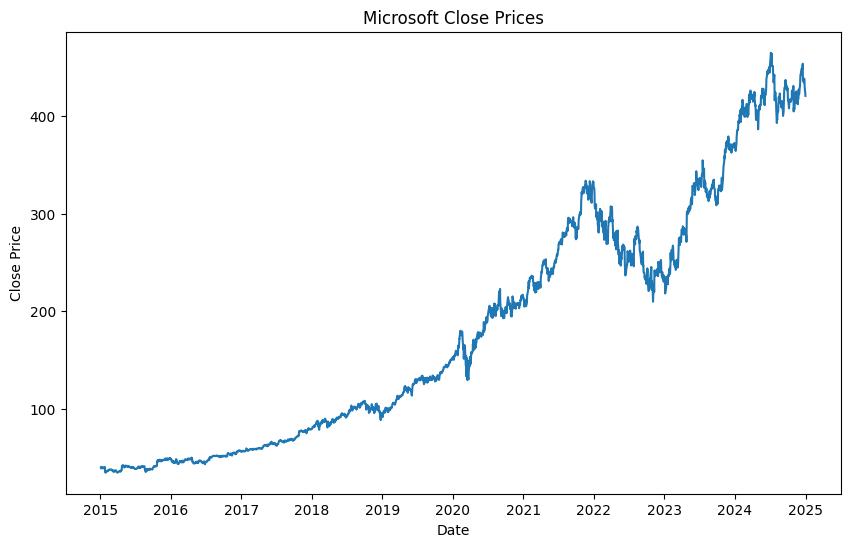

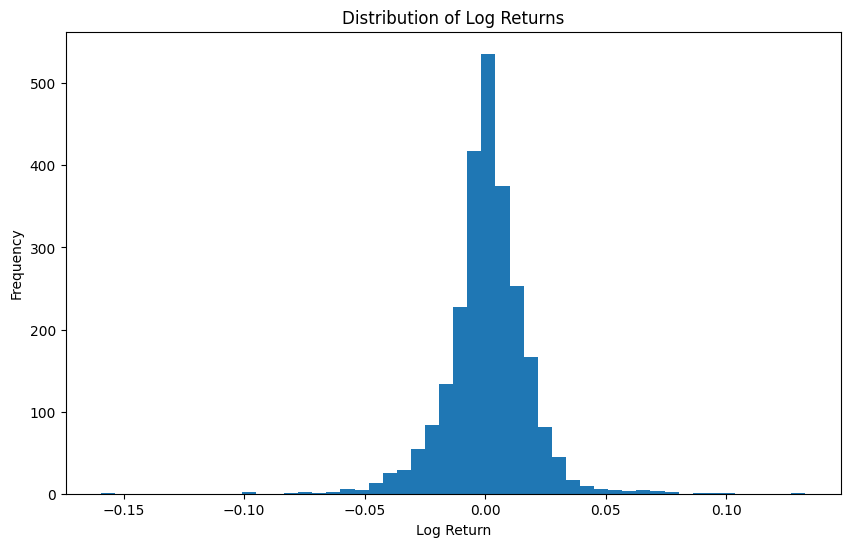

Cleaned data saved as msft_data_cleaned.csv


In [4]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# parameters for data download
ticker = 'MSFT'  # Ticker symbol for Microsoft
start_date = '2015-01-01'
end_date = '2025-01-01'

# MSFT data; columns are stored as a MultiIndex
msft = yf.download(ticker, start=start_date, end=end_date)

# Check if the DataFrame is empty
if msft.empty:
    print("Error: MSFT data download failed. Check the ticker symbol, date range, and network connection.")
else:
    # printing the first few rows
    print("Initial data:")
    print(msft.head())

    # missing values
    print("\nMissing values in each column:")
    print(msft.isnull().sum())

    print("\nType of msft:")
    print(type(msft))

    # missing values fill using forward-fill
    msft = msft.ffill()

    print("\nColumns after forward-fill:")
    print(msft.columns)

    # log returns
    msft.loc[:, ('Log Returns', 'MSFT')] = np.log(
        msft.loc[:, ('Close', 'MSFT')] / msft.loc[:, ('Close', 'MSFT')].shift(1)
    )

    # dropping no return row
    msft = msft.dropna(subset=[('Log Returns', 'MSFT')])

    # check print row
    print("\nFirst five rows of Close and Log Returns:")
    print(msft[[('Close', 'MSFT'), ('Log Returns', 'MSFT')]].head())

    # summary statistics for Log returns
    print("\nSummary statistics for Log Returns:")
    print(msft[[('Log Returns', 'MSFT')]].describe())

    # closing price over time
    plt.figure(figsize=(10, 6))
    plt.plot(msft.index, msft[('Close', 'MSFT')])
    plt.title("Microsoft Close Prices")
    plt.xlabel("Date")
    plt.ylabel("Close Price")
    plt.show()

    # returns histogram
    plt.figure(figsize=(10, 6))
    plt.hist(msft[('Log Returns', 'MSFT')], bins=50)
    plt.title("Distribution of Log Returns")
    plt.xlabel("Log Return")
    plt.ylabel("Frequency")
    plt.show()

    # CSV output
    msft.to_csv("msft_data_cleaned.csv", index=True)
    print("Cleaned data saved as msft_data_cleaned.csv")

[*********************100%***********************]  1 of 1 completed

Initial data:
Price           Close       High        Low       Open   Volume
Ticker            JNJ        JNJ        JNJ        JNJ      JNJ
Date                                                           
2015-01-02  78.681427  79.456804  78.387840  79.080410  5753600
2015-01-05  78.131882  78.839504  78.049075  78.651307  8079300
2015-01-06  77.747955  79.035222  77.492010  78.545909  7428000
2015-01-07  79.464310  79.667566  78.146931  78.222214  7931700
2015-01-08  80.089134  80.164412  79.607350  79.840713  9916000

Missing values in each column:
Price   Ticker
Close   JNJ       0
High    JNJ       0
Low     JNJ       0
Open    JNJ       0
Volume  JNJ       0
dtype: int64

Type of jnj:
<class 'pandas.core.frame.DataFrame'>

Columns after forward-fill:
MultiIndex([( 'Close', 'JNJ'),
            (  'High', 'JNJ'),
            (   'Low', 'JNJ'),
            (  'Open', 'JNJ'),
            ('Volume', 'JNJ')],
           names=['Price', 'Ticker'])

First five rows of Close and Log Retur

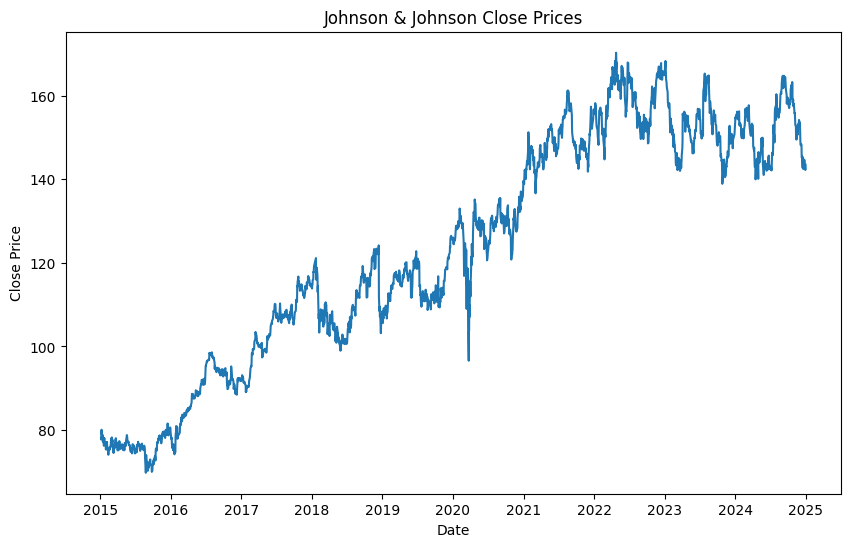

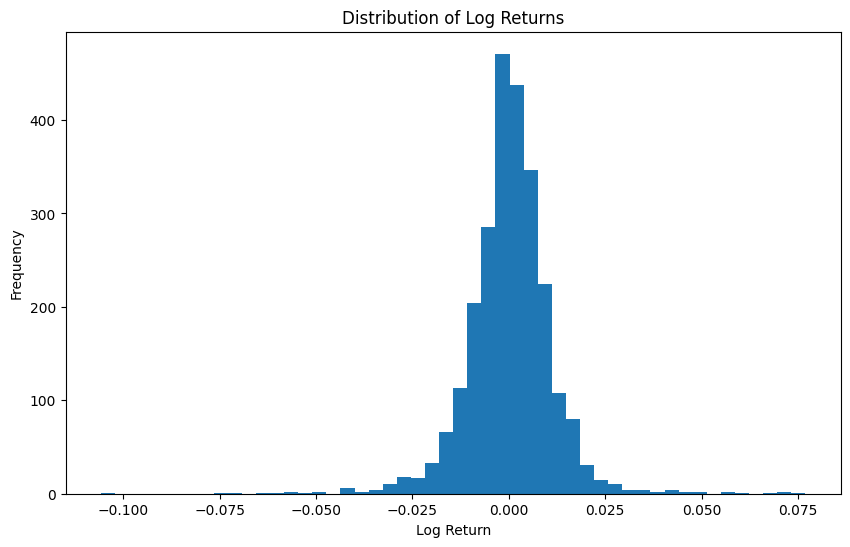

Cleaned data saved as jnj_data_cleaned.csv


In [5]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# parameters for data download
ticker = 'JNJ'  # Ticker symbol for Johnson & Johnson
start_date = '2015-01-01'
end_date = '2025-01-01'

# JNJ data; columns are stored as a MultiIndex
jnj = yf.download(ticker, start=start_date, end=end_date)

# Check if the DataFrame is empty
if jnj.empty:
    print("Error: JNJ data download failed. Check the ticker symbol, date range, and network connection.")
else:
    # printing the first few rows
    print("Initial data:")
    print(jnj.head())

    # missing values
    print("\nMissing values in each column:")
    print(jnj.isnull().sum())

    print("\nType of jnj:")
    print(type(jnj))

    # missing values fill using forward-fill
    jnj = jnj.ffill()

    print("\nColumns after forward-fill:")
    print(jnj.columns)

    # log returns
    jnj.loc[:, ('Log Returns', 'JNJ')] = np.log(
        jnj.loc[:, ('Close', 'JNJ')] / jnj.loc[:, ('Close', 'JNJ')].shift(1)
    )

    # dropping no return row
    jnj = jnj.dropna(subset=[('Log Returns', 'JNJ')])

    # check print row
    print("\nFirst five rows of Close and Log Returns:")
    print(jnj[[('Close', 'JNJ'), ('Log Returns', 'JNJ')]].head())

    # summary statistics for Log returns
    print("\nSummary statistics for Log Returns:")
    print(jnj[[('Log Returns', 'JNJ')]].describe())

    # closing price over time
    plt.figure(figsize=(10, 6))
    plt.plot(jnj.index, jnj[('Close', 'JNJ')])
    plt.title("Johnson & Johnson Close Prices")
    plt.xlabel("Date")
    plt.ylabel("Close Price")
    plt.show()

    # returns histogram
    plt.figure(figsize=(10, 6))
    plt.hist(jnj[('Log Returns', 'JNJ')], bins=50)
    plt.title("Distribution of Log Returns")
    plt.xlabel("Log Return")
    plt.ylabel("Frequency")
    plt.show()

    # CSV output
    jnj.to_csv("jnj_data_cleaned.csv", index=True)
    print("Cleaned data saved as jnj_data_cleaned.csv")

[*********************100%***********************]  1 of 1 completed

Initial data:
Price           Close       High        Low       Open    Volume
Ticker            JPM        JPM        JPM        JPM       JPM
Date                                                            
2015-01-02  47.174259  47.529064  46.857196  46.940236  12600000
2015-01-05  45.709728  47.015720  45.468158  46.849642  20100600
2015-01-06  44.524525  45.860714  44.048931  45.777673  29074100
2015-01-07  44.592464  45.211489  44.290500  45.211489  23843200
2015-01-08  45.588940  45.973945  45.271879  45.271879  16971100

Missing values in each column:
Price   Ticker
Close   JPM       0
High    JPM       0
Low     JPM       0
Open    JPM       0
Volume  JPM       0
dtype: int64

Type of jpm:
<class 'pandas.core.frame.DataFrame'>

Columns after forward-fill:
MultiIndex([( 'Close', 'JPM'),
            (  'High', 'JPM'),
            (   'Low', 'JPM'),
            (  'Open', 'JPM'),
            ('Volume', 'JPM')],
           names=['Price', 'Ticker'])

First five rows of Close and L

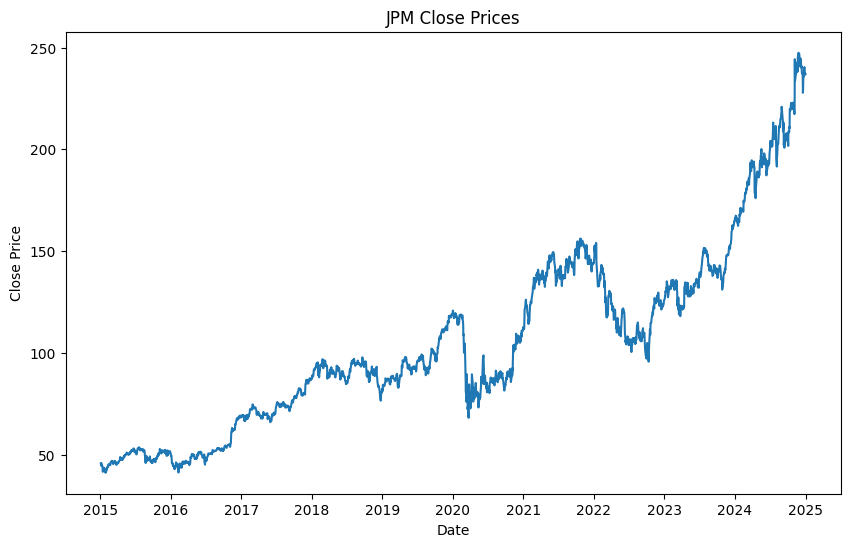

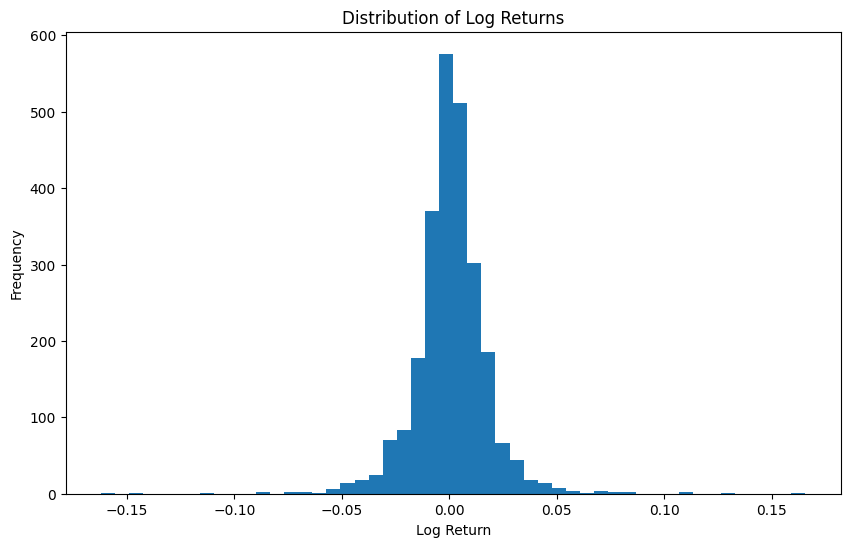

Cleaned data saved as jpm_data_cleaned.csv


In [6]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# parameters for data download
ticker = 'JPM'  # Ticker symbol for JPM
start_date = '2015-01-01'
end_date = '2025-01-01'

# JPM data; columns are stored as a MultiIndex
jpm = yf.download(ticker, start=start_date, end=end_date)

# Check if the DataFrame is empty
if jpm.empty:
    print("Error: JPM data download failed. Check the ticker symbol, date range, and network connection.")
else:
    # printing the first few rows
    print("Initial data:")
    print(jpm.head())

    # missing values
    print("\nMissing values in each column:")
    print(jpm.isnull().sum())

    print("\nType of jpm:")
    print(type(jpm))

    # missing values fill using forward-fill
    jpm = jpm.ffill()

    print("\nColumns after forward-fill:")
    print(jpm.columns)

    # log returns
    jpm.loc[:, ('Log Returns', 'JPM')] = np.log(
        jpm.loc[:, ('Close', 'JPM')] / jpm.loc[:, ('Close', 'JPM')].shift(1)
    )

    # dropping no return row
    jpm = jpm.dropna(subset=[('Log Returns', 'JPM')])

    # check print row
    print("\nFirst five rows of Close and Log Returns:")
    print(jpm[[('Close', 'JPM'), ('Log Returns', 'JPM')]].head())

    # summary statistics for Log returns
    print("\nSummary statistics for Log Returns:")
    print(jpm[[('Log Returns', 'JPM')]].describe())

    # closing price over time
    plt.figure(figsize=(10, 6))
    plt.plot(jpm.index, jpm[('Close', 'JPM')])
    plt.title("JPM Close Prices")
    plt.xlabel("Date")
    plt.ylabel("Close Price")
    plt.show()

    # returns histogram
    plt.figure(figsize=(10, 6))
    plt.hist(jpm[('Log Returns', 'JPM')], bins=50)
    plt.title("Distribution of Log Returns")
    plt.xlabel("Log Return")
    plt.ylabel("Frequency")
    plt.show()

    # CSV output
    jpm.to_csv("jpm_data_cleaned.csv", index=True)
    print("Cleaned data saved as jpm_data_cleaned.csv")

[*********************100%***********************]  1 of 1 completed

Initial data:
Price           Close       High        Low       Open    Volume
Ticker            XOM        XOM        XOM        XOM       XOM
Date                                                            
2015-01-02  59.510239  59.651274  58.856348  59.138419  10220400
2015-01-05  57.881943  59.234595  57.375499  59.042273  18502400
2015-01-06  57.574215  58.599926  57.067772  57.849874  16670700
2015-01-07  58.157578  58.644790  57.696009  58.112703  13590700
2015-01-08  59.125576  59.151214  58.337062  58.497329  15487500

Missing values in each column:
Price   Ticker
Close   XOM       0
High    XOM       0
Low     XOM       0
Open    XOM       0
Volume  XOM       0
dtype: int64

Type of xom:
<class 'pandas.core.frame.DataFrame'>

Columns after forward-fill:
MultiIndex([( 'Close', 'XOM'),
            (  'High', 'XOM'),
            (   'Low', 'XOM'),
            (  'Open', 'XOM'),
            ('Volume', 'XOM')],
           names=['Price', 'Ticker'])

First five rows of Close and L

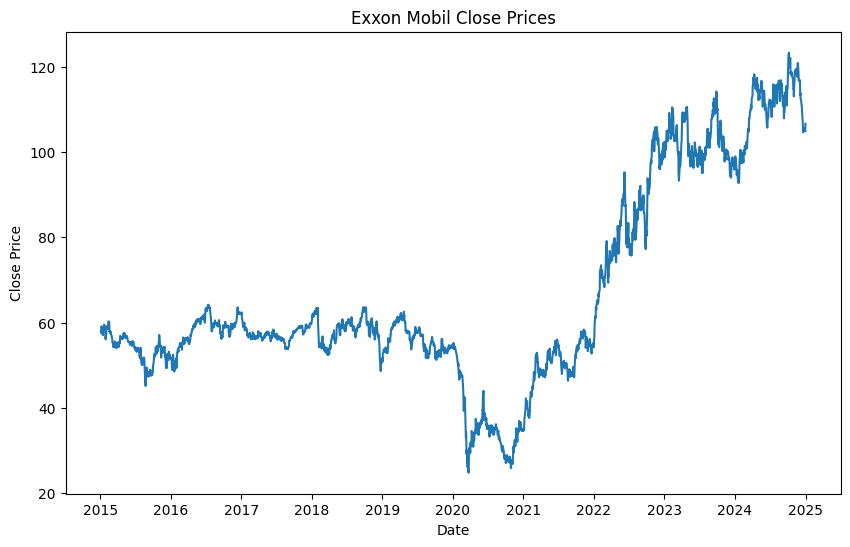

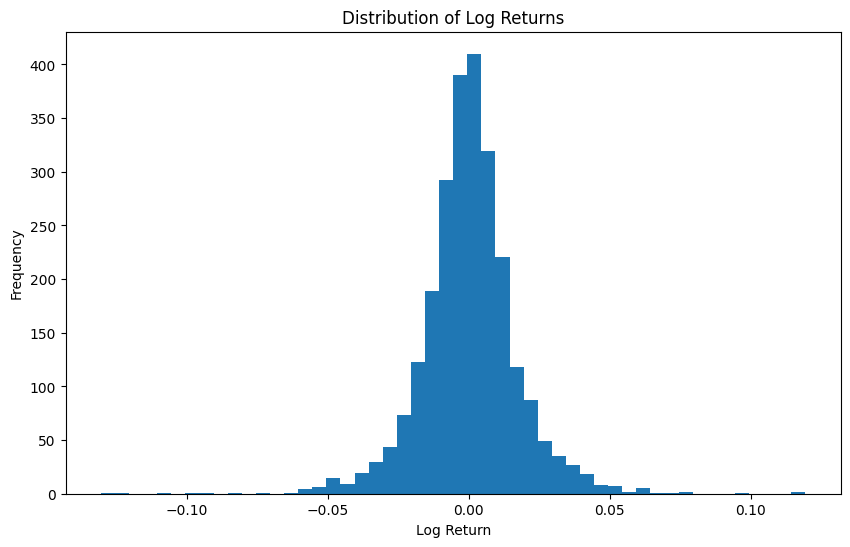

Cleaned data saved as xom_data_cleaned.csv


In [7]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# parameters for data download
ticker = 'XOM'  # Ticker symbol for Exxon Mobil
start_date = '2015-01-01'
end_date = '2025-01-01'

# XOM data; columns are stored as a MultiIndex
xom = yf.download(ticker, start=start_date, end=end_date)

# Check if the DataFrame is empty
if xom.empty:
    print("Error: XOM data download failed. Check the ticker symbol, date range, and network connection.")
else:
    # printing the first few rows
    print("Initial data:")
    print(xom.head())

    # missing values
    print("\nMissing values in each column:")
    print(xom.isnull().sum())

    print("\nType of xom:")
    print(type(xom))

    # missing values fill using forward-fill
    xom = xom.ffill()

    print("\nColumns after forward-fill:")
    print(xom.columns)

    # log returns
    xom.loc[:, ('Log Returns', 'XOM')] = np.log(
        xom.loc[:, ('Close', 'XOM')] / xom.loc[:, ('Close', 'XOM')].shift(1)
    )

    # dropping no return row
    xom = xom.dropna(subset=[('Log Returns', 'XOM')])

    # check print row
    print("\nFirst five rows of Close and Log Returns:")
    print(xom[[('Close', 'XOM'), ('Log Returns', 'XOM')]].head())

    # summary statistics for Log returns
    print("\nSummary statistics for Log Returns:")
    print(xom[[('Log Returns', 'XOM')]].describe())

    # closing price over time
    plt.figure(figsize=(10, 6))
    plt.plot(xom.index, xom[('Close', 'XOM')])
    plt.title("Exxon Mobil Close Prices")
    plt.xlabel("Date")
    plt.ylabel("Close Price")
    plt.show()

    # returns histogram
    plt.figure(figsize=(10, 6))
    plt.hist(xom[('Log Returns', 'XOM')], bins=50)
    plt.title("Distribution of Log Returns")
    plt.xlabel("Log Return")
    plt.ylabel("Frequency")
    plt.show()

    # CSV output
    xom.to_csv("xom_data_cleaned.csv", index=True)
    print("Cleaned data saved as xom_data_cleaned.csv")

[*********************100%***********************]  1 of 1 completed

Initial data:
Price          Close      High       Low      Open     Volume
Ticker          NVDA      NVDA      NVDA      NVDA       NVDA
Date                                                         
2015-01-02  0.483099  0.486699  0.475419  0.483099  113680000
2015-01-05  0.474939  0.484539  0.472780  0.483099  197952000
2015-01-06  0.460540  0.476139  0.460060  0.475659  197764000
2015-01-07  0.459340  0.467980  0.457900  0.463900  321808000
2015-01-08  0.476619  0.479499  0.464380  0.464620  283780000

Missing values in each column:
Price   Ticker
Close   NVDA      0
High    NVDA      0
Low     NVDA      0
Open    NVDA      0
Volume  NVDA      0
dtype: int64

Type of nvda:
<class 'pandas.core.frame.DataFrame'>

Columns after forward-fill:
MultiIndex([( 'Close', 'NVDA'),
            (  'High', 'NVDA'),
            (   'Low', 'NVDA'),
            (  'Open', 'NVDA'),
            ('Volume', 'NVDA')],
           names=['Price', 'Ticker'])

First five rows of Close and Log Returns:
Price 

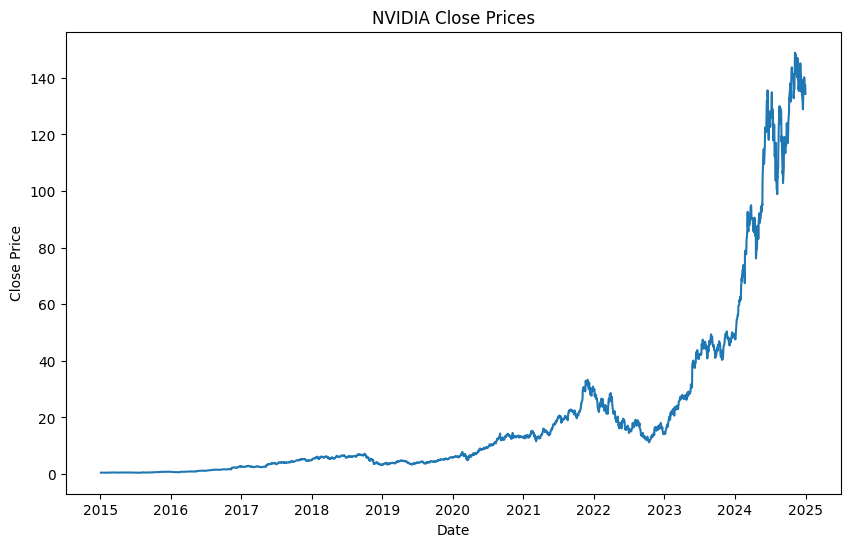

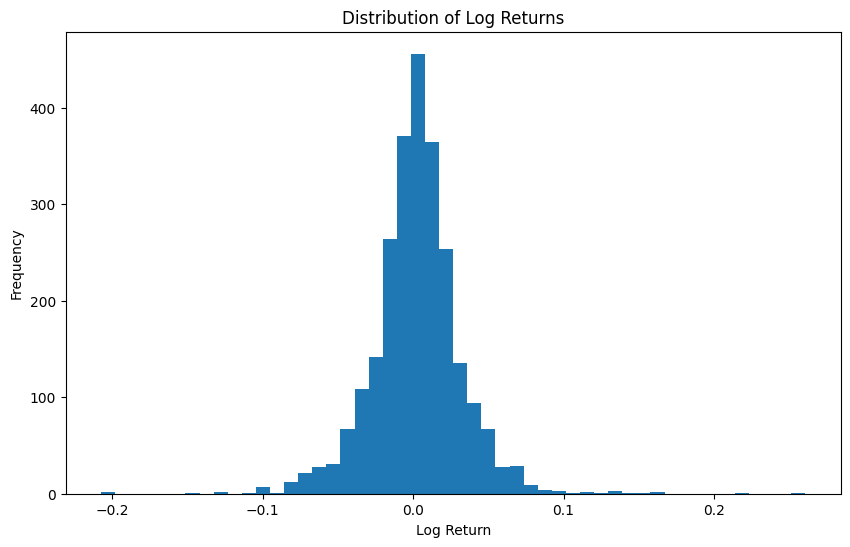

Cleaned data saved as nvda_data_cleaned.csv


In [8]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# parameters for data download
ticker = 'NVDA'  # Ticker symbol for NVIDIA
start_date = '2015-01-01'
end_date = '2025-01-01'

# NVDA data; columns are stored as a MultiIndex
nvda = yf.download(ticker, start=start_date, end=end_date)

# Check if the DataFrame is empty
if nvda.empty:
    print("Error: NVDA data download failed. Check the ticker symbol, date range, and network connection.")
else:
    # printing the first few rows
    print("Initial data:")
    print(nvda.head())

    # missing values
    print("\nMissing values in each column:")
    print(nvda.isnull().sum())

    print("\nType of nvda:")
    print(type(nvda))

    # missing values fill using forward-fill
    nvda = nvda.ffill()

    print("\nColumns after forward-fill:")
    print(nvda.columns)

    # log returns
    nvda.loc[:, ('Log Returns', 'NVDA')] = np.log(
        nvda.loc[:, ('Close', 'NVDA')] / nvda.loc[:, ('Close', 'NVDA')].shift(1)
    )

    # dropping no return row
    nvda = nvda.dropna(subset=[('Log Returns', 'NVDA')])

    # check print row
    print("\nFirst five rows of Close and Log Returns:")
    print(nvda[[('Close', 'NVDA'), ('Log Returns', 'NVDA')]].head())

    # summary statistics for Log returns
    print("\nSummary statistics for Log Returns:")
    print(nvda[[('Log Returns', 'NVDA')]].describe())

    # closing price over time
    plt.figure(figsize=(10, 6))
    plt.plot(nvda.index, nvda[('Close', 'NVDA')])
    plt.title("NVIDIA Close Prices")
    plt.xlabel("Date")
    plt.ylabel("Close Price")
    plt.show()

    # returns histogram
    plt.figure(figsize=(10, 6))
    plt.hist(nvda[('Log Returns', 'NVDA')], bins=50)
    plt.title("Distribution of Log Returns")
    plt.xlabel("Log Return")
    plt.ylabel("Frequency")
    plt.show()

    # CSV output
    nvda.to_csv("nvda_data_cleaned.csv", index=True)
    print("Cleaned data saved as nvda_data_cleaned.csv")

[*********************100%***********************]  1 of 1 completed

Initial data:
Price           Close       High        Low       Open   Volume
Ticker            VTI        VTI        VTI        VTI      VTI
Date                                                           
2015-01-02  88.855446  89.526562  88.310165  89.333614  5298300
2015-01-05  87.328682  88.545080  87.127350  88.377297  5383500
2015-01-06  86.473022  87.664248  85.994854  87.580360  4226100
2015-01-07  87.504875  87.622320  86.867321  87.320318  3661500
2015-01-08  89.048409  89.123906  88.175960  88.259848  2796200

Missing values in each column:
Price   Ticker
Close   VTI       0
High    VTI       0
Low     VTI       0
Open    VTI       0
Volume  VTI       0
dtype: int64

Type of vti:
<class 'pandas.core.frame.DataFrame'>

Columns after forward-fill:
MultiIndex([( 'Close', 'VTI'),
            (  'High', 'VTI'),
            (   'Low', 'VTI'),
            (  'Open', 'VTI'),
            ('Volume', 'VTI')],
           names=['Price', 'Ticker'])

First five rows of Close and Log Retur

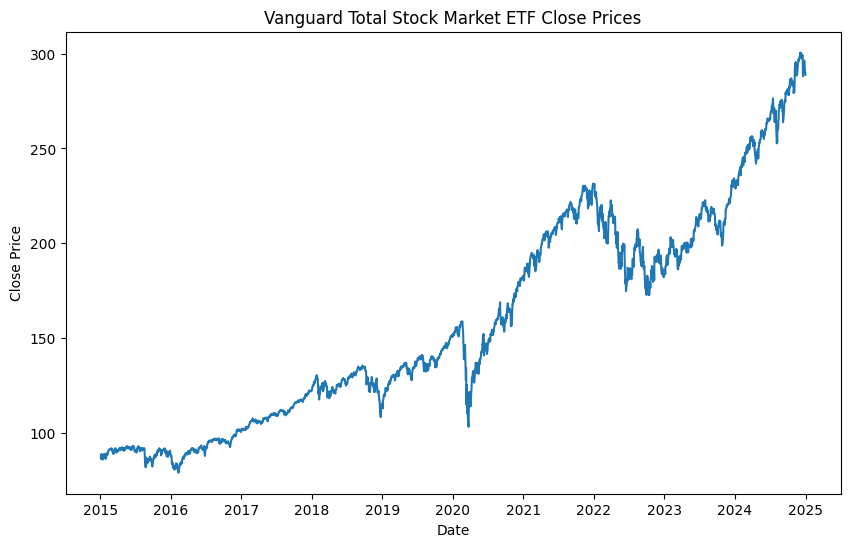

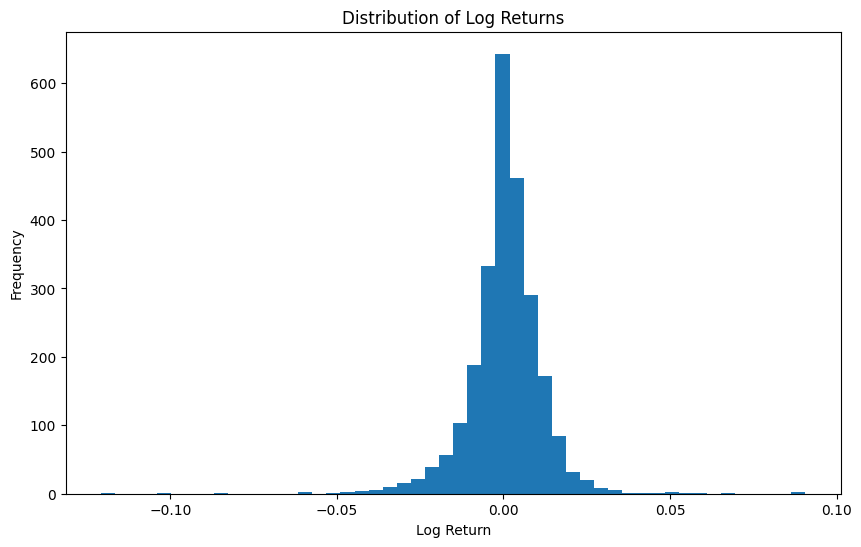

Cleaned data saved as vti_data_cleaned.csv


In [9]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# parameters for data download
ticker = 'VTI'  # Ticker symbol for Vanguard Total Stock Market ETF
start_date = '2015-01-01'
end_date = '2025-01-01'

# VTI data; columns are stored as a MultiIndex
vti = yf.download(ticker, start=start_date, end=end_date)

# Check if the DataFrame is empty
if vti.empty:
    print("Error: VTI data download failed. Check the ticker symbol, date range, and network connection.")
else:
    # printing the first few rows
    print("Initial data:")
    print(vti.head())

    # missing values
    print("\nMissing values in each column:")
    print(vti.isnull().sum())

    print("\nType of vti:")
    print(type(vti))

    # missing values fill using forward-fill
    vti = vti.ffill()

    print("\nColumns after forward-fill:")
    print(vti.columns)

    # log returns
    vti.loc[:, ('Log Returns', 'VTI')] = np.log(
        vti.loc[:, ('Close', 'VTI')] / vti.loc[:, ('Close', 'VTI')].shift(1)
    )

    # dropping no return row
    vti = vti.dropna(subset=[('Log Returns', 'VTI')])

    # check print row
    print("\nFirst five rows of Close and Log Returns:")
    print(vti[[('Close', 'VTI'), ('Log Returns', 'VTI')]].head())

    # summary statistics for Log returns
    print("\nSummary statistics for Log Returns:")
    print(vti[[('Log Returns', 'VTI')]].describe())

    # closing price over time
    plt.figure(figsize=(10, 6))
    plt.plot(vti.index, vti[('Close', 'VTI')])
    plt.title("Vanguard Total Stock Market ETF Close Prices")
    plt.xlabel("Date")
    plt.ylabel("Close Price")
    plt.show()

    # returns histogram
    plt.figure(figsize=(10, 6))
    plt.hist(vti[('Log Returns', 'VTI')], bins=50)
    plt.title("Distribution of Log Returns")
    plt.xlabel("Log Return")
    plt.ylabel("Frequency")
    plt.show()

    # CSV output
    vti.to_csv("vti_data_cleaned.csv", index=True)
    print("Cleaned data saved as vti_data_cleaned.csv")

[*********************100%***********************]  1 of 1 completed



Initial data:
Price            Close        High         Low        Open    Volume
Ticker             TLT         TLT         TLT         TLT       TLT
Date                                                                
2015-01-02   97.964401   98.226012   97.064164   97.171885   9432000
2015-01-05   99.503281   99.741803   98.456843   98.495312   9789500
2015-01-06  101.296036  101.942370  100.172668  100.565075  18331300
2015-01-07  101.095985  101.542259  100.157275  100.565074   9762900
2015-01-08   99.757179  100.311173   99.580213  100.303483   8055300

Missing values in each column:
Price   Ticker
Close   TLT       0
High    TLT       0
Low     TLT       0
Open    TLT       0
Volume  TLT       0
dtype: int64

Type of tlt:
<class 'pandas.core.frame.DataFrame'>

Columns after forward-fill:
MultiIndex([( 'Close', 'TLT'),
            (  'High', 'TLT'),
            (   'Low', 'TLT'),
            (  'Open', 'TLT'),
            ('Volume', 'TLT')],
           names=['Price', 'Ticker'])

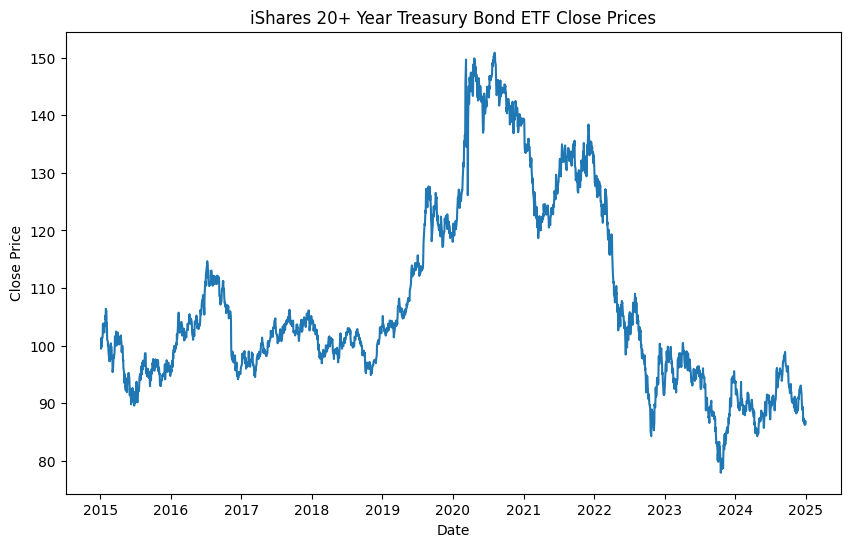

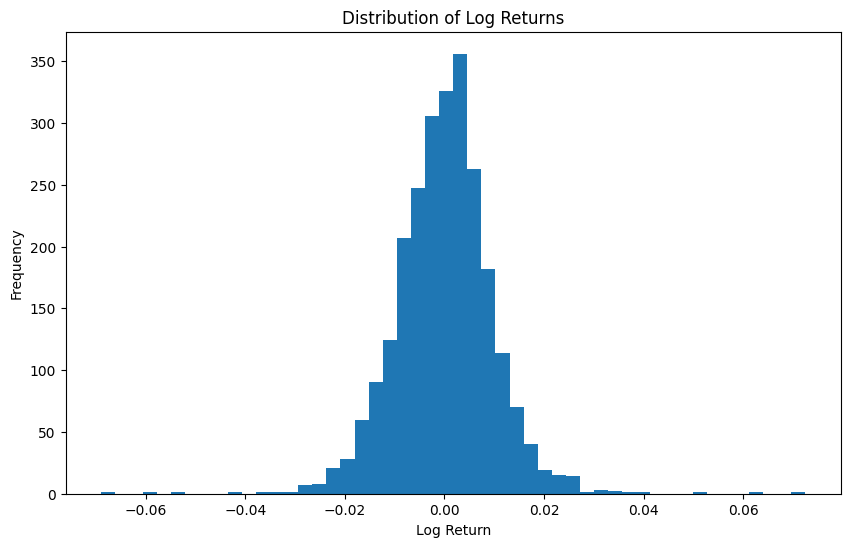

Cleaned data saved as tlt_data_cleaned.csv


In [10]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# parameters for data download
ticker = 'TLT'  # Ticker symbol for iShares 20+ Year Treasury Bond ETF
start_date = '2015-01-01'
end_date = '2025-01-01'

# TLT data; columns are stored as a MultiIndex
tlt = yf.download(ticker, start=start_date, end=end_date)

# Check if the DataFrame is empty
if tlt.empty:
    print("Error: TLT data download failed. Check the ticker symbol, date range, and network connection.")
else:
    # printing the first few rows
    print("Initial data:")
    print(tlt.head())

    # missing values
    print("\nMissing values in each column:")
    print(tlt.isnull().sum())

    print("\nType of tlt:")
    print(type(tlt))

    # missing values fill using forward-fill
    tlt = tlt.ffill()

    print("\nColumns after forward-fill:")
    print(tlt.columns)

    # log returns
    tlt.loc[:, ('Log Returns', 'TLT')] = np.log(
        tlt.loc[:, ('Close', 'TLT')] / tlt.loc[:, ('Close', 'TLT')].shift(1)
    )

    # dropping no return row
    tlt = tlt.dropna(subset=[('Log Returns', 'TLT')])

    # check print row
    print("\nFirst five rows of Close and Log Returns:")
    print(tlt[[('Close', 'TLT'), ('Log Returns', 'TLT')]].head())

    # summary statistics for Log returns
    print("\nSummary statistics for Log Returns:")
    print(tlt[[('Log Returns', 'TLT')]].describe())

    # closing price over time
    plt.figure(figsize=(10, 6))
    plt.plot(tlt.index, tlt[('Close', 'TLT')])
    plt.title("iShares 20+ Year Treasury Bond ETF Close Prices")
    plt.xlabel("Date")
    plt.ylabel("Close Price")
    plt.show()

    # returns histogram
    plt.figure(figsize=(10, 6))
    plt.hist(tlt[('Log Returns', 'TLT')], bins=50)
    plt.title("Distribution of Log Returns")
    plt.xlabel("Log Return")
    plt.ylabel("Frequency")
    plt.show()

    # CSV output
    tlt.to_csv("tlt_data_cleaned.csv", index=True)
    print("Cleaned data saved as tlt_data_cleaned.csv")

[*********************100%***********************]  1 of 1 completed

Initial data:
Price            Close        High         Low        Open    Volume
Ticker             GLD         GLD         GLD         GLD       GLD
Date                                                                
2015-01-02  114.080002  114.800003  112.320000  112.489998   7109600
2015-01-05  115.800003  116.000000  114.730003  114.779999   8177400
2015-01-06  117.120003  117.500000  115.800003  116.220001  11238300
2015-01-07  116.430000  116.879997  116.169998  116.470001   6434200
2015-01-08  115.940002  116.870003  115.849998  116.449997   7033700

Missing values in each column:
Price   Ticker
Close   GLD       0
High    GLD       0
Low     GLD       0
Open    GLD       0
Volume  GLD       0
dtype: int64

Type of gld:
<class 'pandas.core.frame.DataFrame'>

Columns after forward-fill:
MultiIndex([( 'Close', 'GLD'),
            (  'High', 'GLD'),
            (   'Low', 'GLD'),
            (  'Open', 'GLD'),
            ('Volume', 'GLD')],
           names=['Price', 'Ticker'])

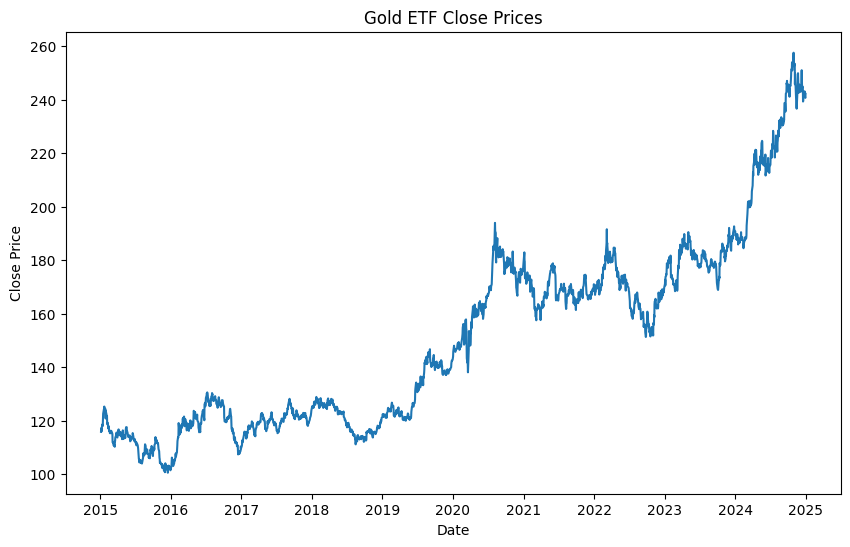

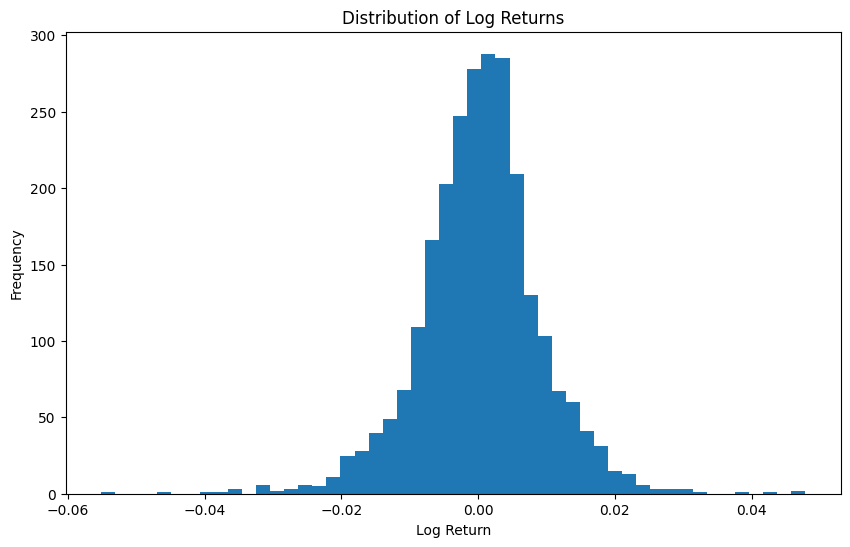

Cleaned data saved as gld_data_cleaned.csv


In [11]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# parameters for data download
ticker = 'GLD'  # Ticker symbol for Gold ETF
start_date = '2015-01-01'
end_date = '2025-01-01'

# GLD data; columns are stored as a MultiIndex
gld = yf.download(ticker, start=start_date, end=end_date)

# Check if the DataFrame is empty
if gld.empty:
    print("Error: GLD data download failed. Check the ticker symbol, date range, and network connection.")
else:
    # printing the first few rows
    print("Initial data:")
    print(gld.head())

    # missing values
    print("\nMissing values in each column:")
    print(gld.isnull().sum())

    print("\nType of gld:")
    print(type(gld))

    # missing values fill using forward-fill
    gld = gld.ffill()

    print("\nColumns after forward-fill:")
    print(gld.columns)

    # log returns
    gld.loc[:, ('Log Returns', 'GLD')] = np.log(
        gld.loc[:, ('Close', 'GLD')] / gld.loc[:, ('Close', 'GLD')].shift(1)
    )

    # dropping no return row
    gld = gld.dropna(subset=[('Log Returns', 'GLD')])

    # check print row
    print("\nFirst five rows of Close and Log Returns:")
    print(gld[[('Close', 'GLD'), ('Log Returns', 'GLD')]].head())

    # summary statistics for Log returns
    print("\nSummary statistics for Log Returns:")
    print(gld[[('Log Returns', 'GLD')]].describe())

    # closing price over time
    plt.figure(figsize=(10, 6))
    plt.plot(gld.index, gld[('Close', 'GLD')])
    plt.title("Gold ETF Close Prices")
    plt.xlabel("Date")
    plt.ylabel("Close Price")
    plt.show()

    # returns histogram
    plt.figure(figsize=(10, 6))
    plt.hist(gld[('Log Returns', 'GLD')], bins=50)
    plt.title("Distribution of Log Returns")
    plt.xlabel("Log Return")
    plt.ylabel("Frequency")
    plt.show()

    # CSV output
    gld.to_csv("gld_data_cleaned.csv", index=True)
    print("Cleaned data saved as gld_data_cleaned.csv")

[*********************100%***********************]  1 of 1 completed

Initial data:
Price           Close       High        Low       Open   Volume
Ticker            VNQ        VNQ        VNQ        VNQ      VNQ
Date                                                           
2015-01-02  54.639709  54.686228  54.054898  54.294138  5570500
2015-01-05  54.938770  55.078326  54.327381  54.493520  6073700
2015-01-06  55.483692  55.656478  54.991923  54.991923  7577100
2015-01-07  56.334335  56.414084  55.403962  55.696363  6920700
2015-01-08  56.546989  56.726422  56.095097  56.719775  5255000

Missing values in each column:
Price   Ticker
Close   VNQ       0
High    VNQ       0
Low     VNQ       0
Open    VNQ       0
Volume  VNQ       0
dtype: int64

Type of vnq:
<class 'pandas.core.frame.DataFrame'>

Columns after forward-fill:
MultiIndex([( 'Close', 'VNQ'),
            (  'High', 'VNQ'),
            (   'Low', 'VNQ'),
            (  'Open', 'VNQ'),
            ('Volume', 'VNQ')],
           names=['Price', 'Ticker'])

First five rows of Close and Log Retur

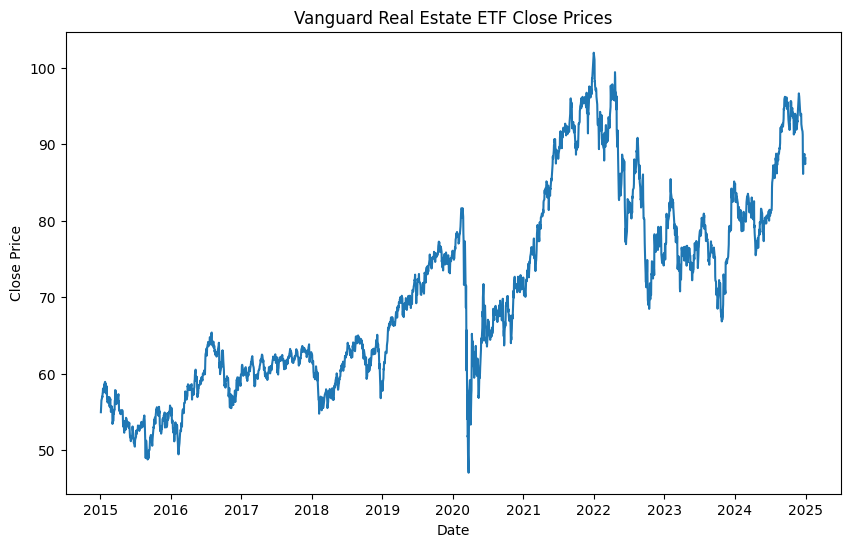

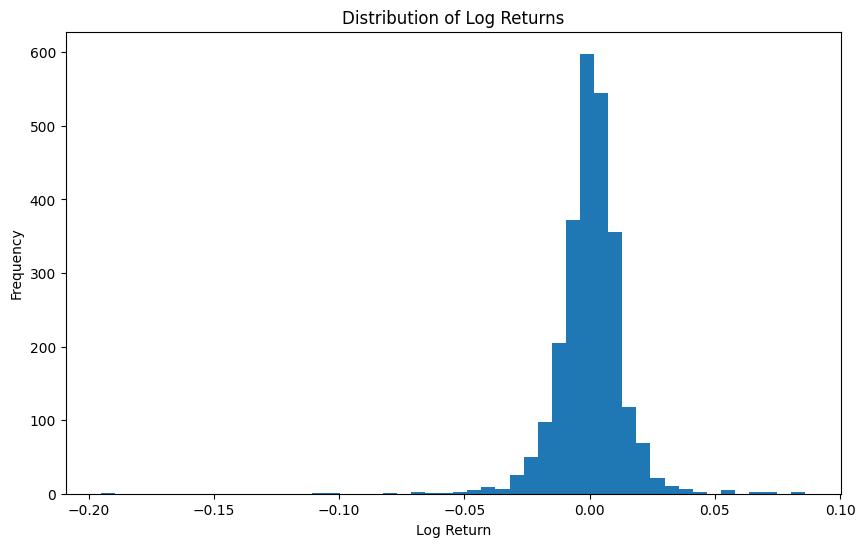

Cleaned data saved as vnq_data_cleaned.csv


In [12]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# parameters for data download
ticker = 'VNQ'  # Ticker symbol for Vanguard Real Estate ETF
start_date = '2015-01-01'
end_date = '2025-01-01'

# VNQ data; columns are stored as a MultiIndex
vnq = yf.download(ticker, start=start_date, end=end_date)

# Check if the DataFrame is empty
if vnq.empty:
    print("Error: VNQ data download failed. Check the ticker symbol, date range, and network connection.")
else:
    # printing the first few rows
    print("Initial data:")
    print(vnq.head())

    # missing values
    print("\nMissing values in each column:")
    print(vnq.isnull().sum())

    print("\nType of vnq:")
    print(type(vnq))

    # missing values fill using forward-fill
    vnq = vnq.ffill()

    print("\nColumns after forward-fill:")
    print(vnq.columns)

    # log returns
    vnq.loc[:, ('Log Returns', 'VNQ')] = np.log(
        vnq.loc[:, ('Close', 'VNQ')] / vnq.loc[:, ('Close', 'VNQ')].shift(1)
    )

    # dropping no return row
    vnq = vnq.dropna(subset=[('Log Returns', 'VNQ')])

    # check print row
    print("\nFirst five rows of Close and Log Returns:")
    print(vnq[[('Close', 'VNQ'), ('Log Returns', 'VNQ')]].head())

    # summary statistics for Log returns
    print("\nSummary statistics for Log Returns:")
    print(vnq[[('Log Returns', 'VNQ')]].describe())

    # closing price over time
    plt.figure(figsize=(10, 6))
    plt.plot(vnq.index, vnq[('Close', 'VNQ')])
    plt.title("Vanguard Real Estate ETF Close Prices")
    plt.xlabel("Date")
    plt.ylabel("Close Price")
    plt.show()

    # returns histogram
    plt.figure(figsize=(10, 6))
    plt.hist(vnq[('Log Returns', 'VNQ')], bins=50)
    plt.title("Distribution of Log Returns")
    plt.xlabel("Log Return")
    plt.ylabel("Frequency")
    plt.show()

    # CSV output
    vnq.to_csv("vnq_data_cleaned.csv", index=True)
    print("Cleaned data saved as vnq_data_cleaned.csv")